<AxesSubplot:xlabel='date'>

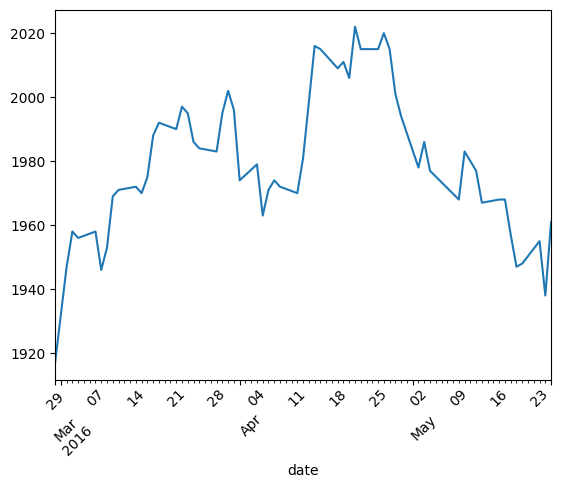

In [7]:
import pandas as pd
import datetime
# pandas에서 이동평균을 구할 수 있다!

%matplotlib inline 

#2016-05-25 ~ 2016-02-29 까지의 코스피지수
series = pd.read_csv('kospi3.csv', header=0, index_col=0)

# szueeze 는 차원 축소! 
# np.squeeze와 pd.squeeze와 차원축소의 기능은 같지만 방법이 다름
# np.squeeze는 (1,3,1,3)shape에서 1인 차원을 줄여준다. --> (3,3)shape
# pd.squeeze는 로우 또는 컬럼기준으로 여러개의 컬럼 또는 로우들의 이름을 인덱스로 하는(Series)로 변환시켜준다.
# pandas의 DatetimeIndex로 데이터를 Datetime타입으로 생성하고 to_period('D')을 기준으로 PeriodIndex타입으로 변환
series.index = pd.DatetimeIndex(series.index).to_period('D')
series = series.squeeze(axis=1)
series = series.sort_index()
series.plot(rot=45)

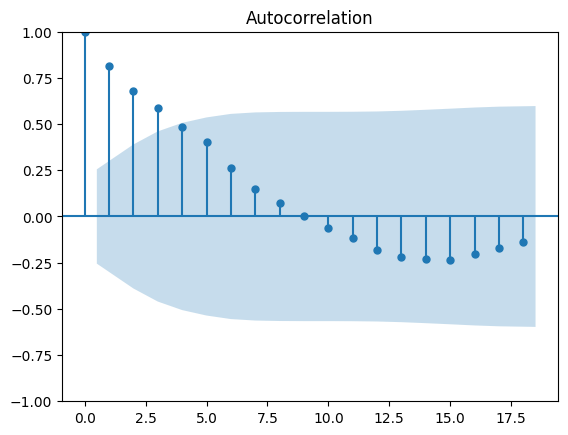

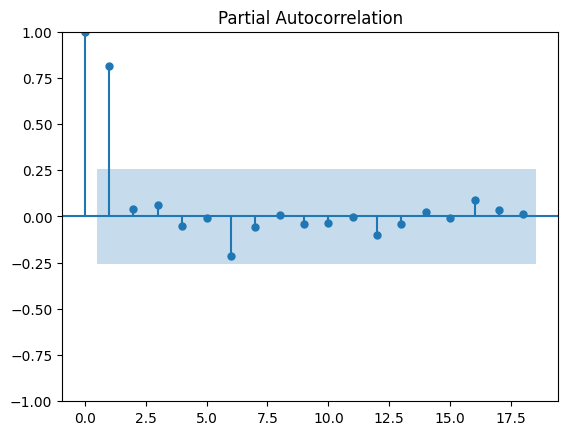

In [8]:
# ACF, PACF 곡선을 그리기 위한 라이브러리 statsmodels 설치 필요함

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#ACF , PACF곡선 그리기 
plot_acf(series)
plot_pacf(series, method='ywm')
plt.show()

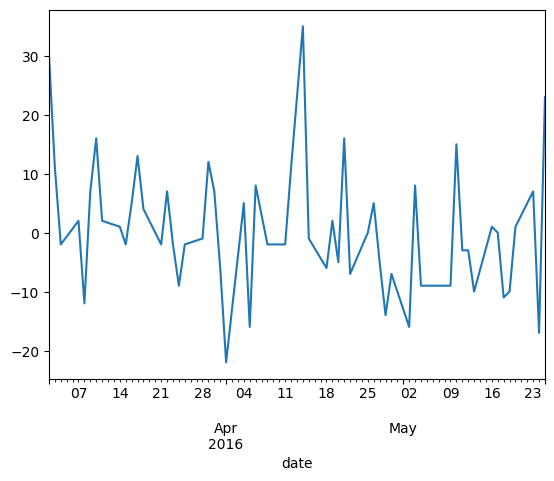

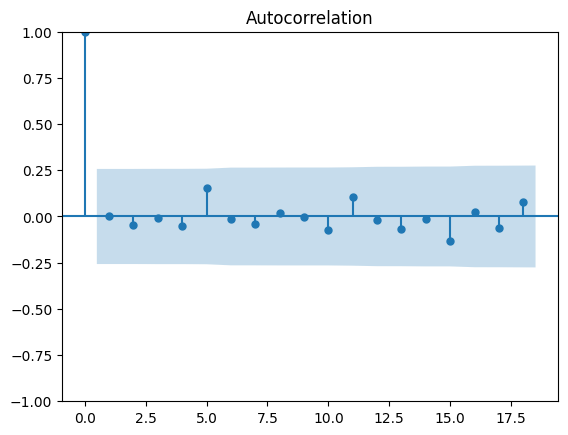

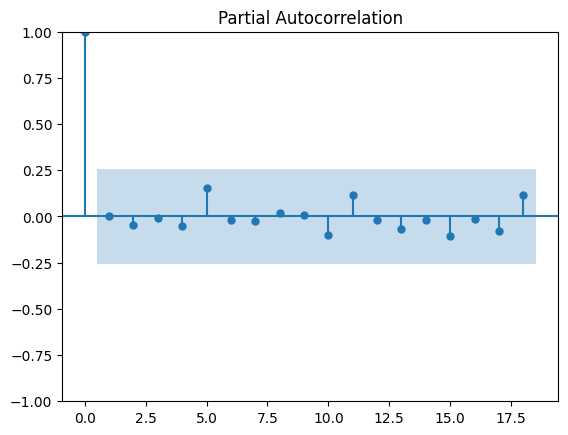

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 차분곡선 그래프
# 차분을 적용하여 정상성화!
diff_1=series.diff(periods=1).iloc[1:]
diff_1.plot()
# 그 다음 다시 한 번 ACF, PACF그래프 그리기
plot_acf(diff_1)
plot_pacf(diff_1, method='ywm')
plt.show()

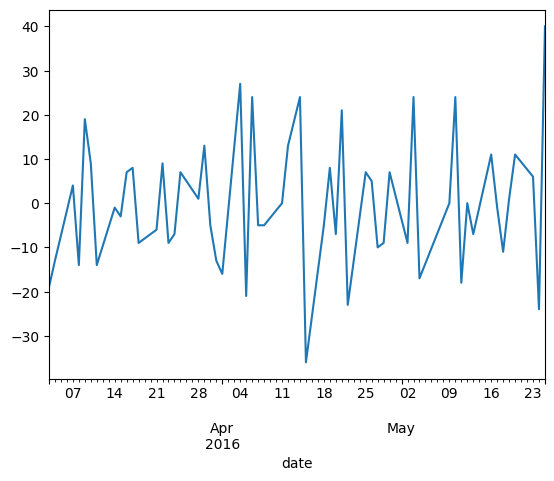

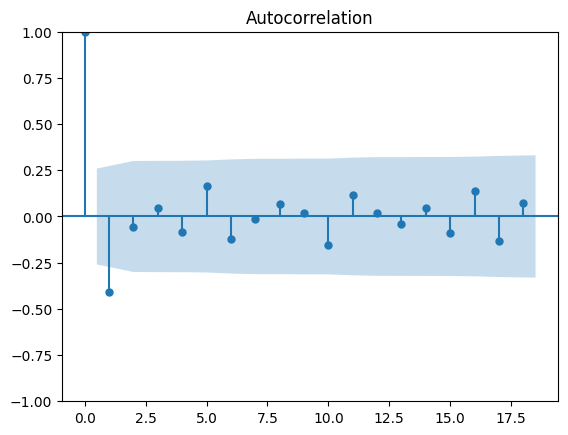

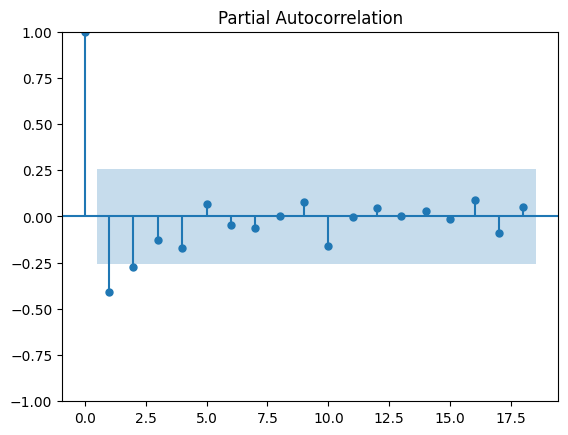

In [10]:
# 또 차분 해보기 
diff_2=diff_1.diff(periods=1).iloc[1:]
diff_2.plot()
# 다시 ACF, PACF그래프 그리기
plot_acf(diff_2)
plot_pacf(diff_2, method='ywm')
plt.show()

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA(1,2,1)모델 만들고 훈련하기 
# P-value가 0.05보다 크다는 것은 유의성이 없다라는 뜻이고 이는 우연으로 얻은 값이라고 본다.
# 반대로 0.05보다 작다는 것은 유의성이 있다는 뜻이고 이는 우연이라고 생각되지 않을 정도로 의미가 있다는 뜻이다.
model = ARIMA(series, order=(1,2,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                   59
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -218.992
Date:                Mon, 26 Sep 2022   AIC                            443.983
Time:                        15:28:59   BIC                            450.112
Sample:                    02-29-2016   HQIC                           446.365
                         - 05-25-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0113      0.188     -0.060      0.952      -0.380       0.357
ma.L1         -0.9414      0.072    -13.013      0.000      -1.083      -0.800
sigma2       122.2092     24.740      4.940      0.0

In [49]:
model = ARIMA(series, order=(0,2,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                   59
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -218.994
Date:                Mon, 26 Sep 2022   AIC                            441.988
Time:                        15:45:04   BIC                            446.074
Sample:                    02-29-2016   HQIC                           443.576
                         - 05-25-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9426      0.064    -14.811      0.000      -1.067      -0.818
sigma2       122.2244     22.021      5.550      0.000      79.065     165.384
Ljung-Box (L1) (Q):                   0.02   Jarque-

<AxesSubplot:xlabel='date'>

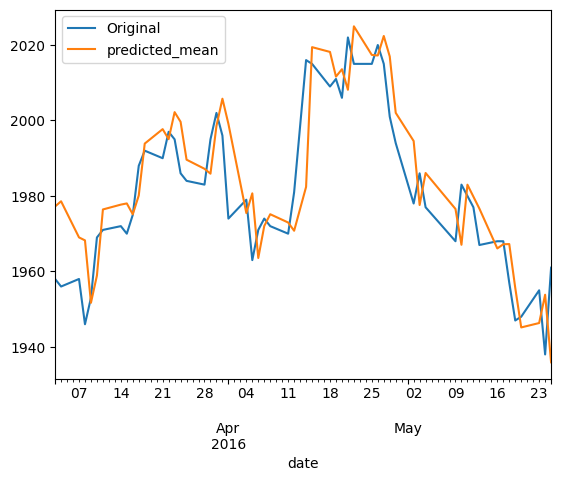

In [57]:
pred1 = model_fit.predict()
series.iloc[2:].plot(label="Original", legend=True)
pred1.iloc[2:].plot(legend=True)

In [28]:
fore = model_fit.forecast(steps=1)
print(fore)

2016-04-28    1960.355469
Freq: D, dtype: float64
